<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1d8lmQCL40i0rGj_qMFjj5dUXdQYR_ixe" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

---

# **Licencia**

**Autor**: Juan Francisco Puentes Calvo

**Licencia**: GPL v3 (https://www.gnu.org/licenses/gpl-3.0.html)


# **Reconocimientos**

* Ninguno, por ahora.

---

## Clasificación de imágenes (GPU)

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

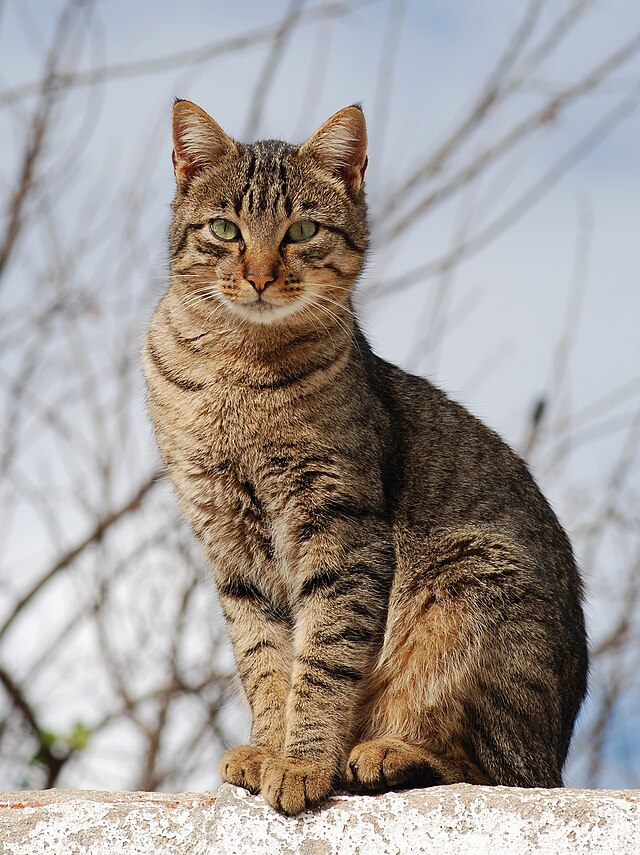


0: 640x480 1 cat, 1 bed, 123.7ms
Speed: 7.0ms preprocess, 123.7ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 480)
Score: 0.84, Label: cat
Score: 0.44, Label: bed


In [1]:
# prompt: Dada una imagen referenciada mediante una url, descargala, muestrala y, empleando yolo v8, mostrar el cojunto de scores que ha entregado el algoritmo junto con sus etiquetas correspondientes.

!pip -q install ultralytics

from IPython.display import display
from ultralytics import YOLO
import numpy as np
from PIL import Image  # Import Image from PIL
'''
import requests
from io import BytesIO

# Load an image from URL
url = 'https://raw.githubusercontent.com/FranPuentes/iTI2025/main/data/gato.jpg'
response = requests.get(url)
image = Image.open(BytesIO(response.content))
'''
image = Image.open('data/gato.jpg')
# Display the image
display(image)

# Load a model
model = YOLO('data/yolov8n.pt')

# Perform prediction
results = model(image)

# Show scores and labels
for result in results:
  for r in result.boxes.data:
    score = r[4]
    class_id = int(r[5])
    label = model.names[class_id]
    print(f"Score: {score:.2f}, Label: {label}")


## Entrenando modelos de reconocimiento de patrones

### Clasificador de dígitos

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


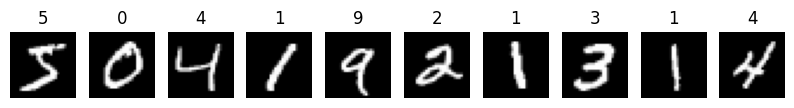

In [1]:
# prompt: Descarga el dataset MNIST digits y cárgalo en memoria en un dataframe. Muestra un ejemplo de 10 imágenes y su correspondiente etiqueta, todo ello en una fila.

import tensorflow as tf
import matplotlib.pyplot as plt

# Descarga el dataset MNIST digits
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Muestra un ejemplo de 10 imágenes y su correspondiente etiqueta
fig, axes = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
  axes[i].imshow(x_train[i], cmap='gray')
  axes[i].set_title(y_train[i])
  axes[i].axis('off')
plt.show()


In [2]:
# prompt: Usando xgboost entrena un modelo usando el conjunto de entrenamiento. Usa crossvalidation para mostrar una evaluación sin usar el conjunto de testeo.

import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Reshape the data to fit XGBoost's input format
x_train_flattened = x_train.reshape(x_train.shape[0], -1)

# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Perform cross-validation
scores = cross_val_score(model, x_train_flattened, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())


Cross-validation scores: [0.97708333 0.976      0.97458333 0.97133333 0.97708333]
Average accuracy: 0.9752166666666667


In [3]:
# prompt: Usando una red neuronal convolucional entrena un modelo usando el conjunto de entrenamiento. Si así lo consideras, usa “cross validation” para mostrar una evaluación sin usar el conjunto de testeo.

import numpy as np
# Reshape the data to fit the CNN input format
x_train_cnn = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_cnn = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalize pixel values
x_train_cnn = x_train_cnn / 255.0
x_test_cnn = x_test_cnn / 255.0

# Define the CNN model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Perform cross-validation
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True)
scores = []
for train_index, val_index in kfold.split(x_train_cnn):
  x_train_fold, x_val_fold = x_train_cnn[train_index], x_train_cnn[val_index]
  y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
  model.fit(x_train_fold, y_train_fold, epochs=5)
  _, accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
  scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average accuracy:", np.mean(scores))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.8737 - loss: 0.4030
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9815 - loss: 0.0616
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9878 - loss: 0.0399
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9901 - loss: 0.0301
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9925 - loss: 0.0228
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9923 - loss: 0.0229
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9943 - loss: 0.0182
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9963 - loss: 0.0132
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9967 - loss: 0.0101
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9969 - loss: 0.0107
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9959 - loss: 0.0131
Epoch 2/5
1500/1500 ━

In [4]:
# prompt: Muestra el esquema de la red neuronal utilizada

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9983 - loss: 0.0054
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9996 - loss: 0.0013
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9986 - loss: 0.0039
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 29ms/step - accuracy: 0.9997 - loss: 8.8481e-04
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9990 - loss: 0.0028
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9991 - loss: 0.0026
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 29ms/step - accuracy: 0.9993 - loss: 0.0017
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9994 - loss: 0.0016
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9989 - loss: 0.0033
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9996 - loss: 0.0013


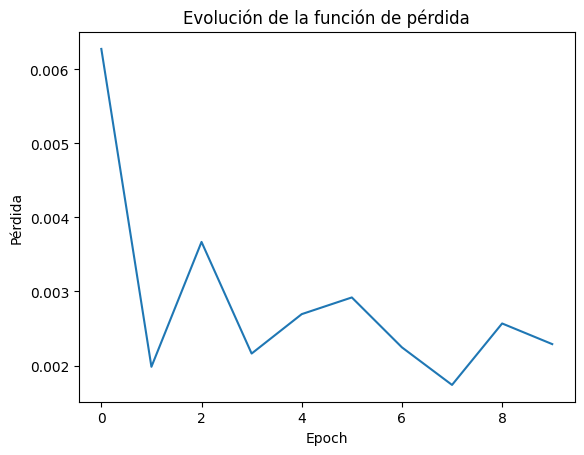

In [5]:
# prompt: Usando la red neuronal, entrena un modelo usando el conjunto de entrenamiento. Presenta como resultado la evolución de la función de pérdida a través de 10 epochs. No hagas una evaluación del modelo.

import matplotlib.pyplot as plt
# Entrena el modelo usando el conjunto de entrenamiento
history = model.fit(x_train_cnn, y_train, epochs=10)

# Grafica la evolución de la función de pérdida
plt.plot(history.history['loss'])
plt.title('Evolución de la función de pérdida')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.show()


Precisión en el conjunto de prueba: 0.9915000200271606
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


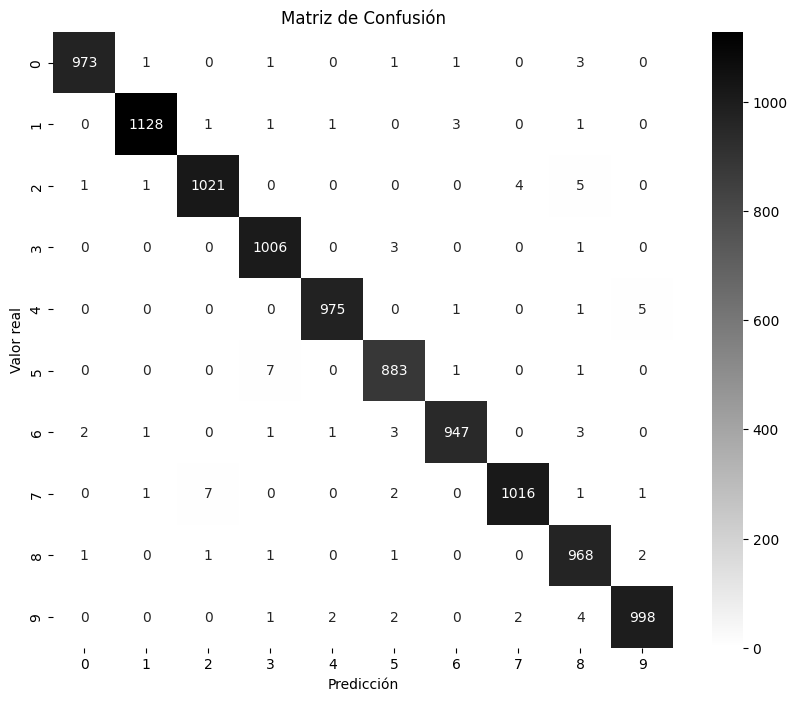

In [7]:
# prompt: Evalúa el modelo usando el testset. Muestra la matriz de confusión. Usa un colormap de tonos de grises.

import matplotlib.pyplot as plt
import numpy as np
# Evalúa el modelo usando el conjunto de prueba
_, accuracy = model.evaluate(x_test_cnn, y_test, verbose=0)
print('Precisión en el conjunto de prueba:', accuracy)

# Predice las etiquetas para el conjunto de prueba
y_pred = model.predict(x_test_cnn)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calcula la matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Muestra la matriz de confusión
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='gray_r')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()


In [8]:
# prompt: Guarda el modelo en un fichero de tal manera que pueda recuperarlo más tarde. Muestra un ejemplo de cómo leerlo.

import numpy as np
# Guarda el modelo en un fichero
model.save('modelo_mnist.h5')

# Carga el modelo desde el fichero
loaded_model = tf.keras.models.load_model('modelo_mnist.h5')

# Ejemplo de cómo usar el modelo cargado para hacer predicciones
y_pred_loaded = loaded_model.predict(x_test_cnn)
y_pred_labels_loaded = np.argmax(y_pred_loaded, axis=1)

# Calcula la precisión del modelo cargado
_, accuracy_loaded = loaded_model.evaluate(x_test_cnn, y_test, verbose=0)
print('Precisión del modelo cargado en el conjunto de prueba:', accuracy_loaded)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Precisión del modelo cargado en el conjunto de prueba: 0.9915000200271606


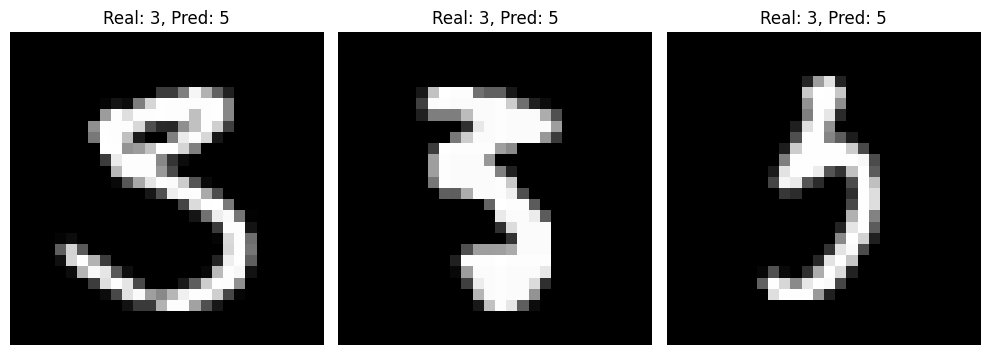

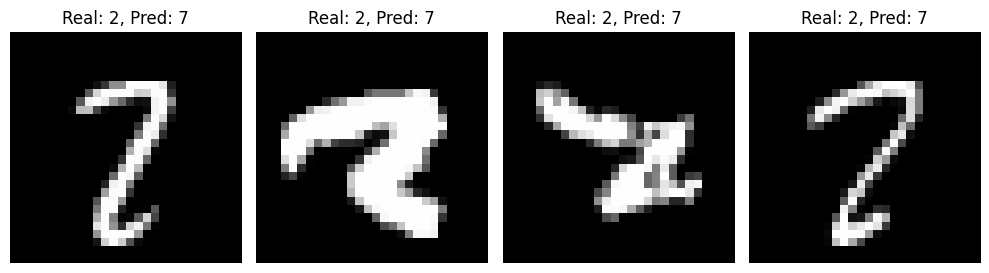

In [13]:
# prompt: Usando este modelo búsca los casos en donde confunde el dígito 3 con el 5, y cuando confunde el dígito 2 co el 7. Muestra en dichos casos la imagen y su etiqueta.

import matplotlib.pyplot as plt
import numpy as np
# Encuentra los casos donde el modelo confunde el 3 con el 5
confundidos_3_5 = np.where((y_test == 3) & (y_pred_labels == 5))[0]

# Encuentra los casos donde el modelo confunde el 2 con el 7
confundidos_2_7 = np.where((y_test == 2) & (y_pred_labels == 7))[0]

# Muestra las imágenes y etiquetas confundidas
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Casos confundidos 3 con 5
for i in range(len(confundidos_3_5)):
  idx = confundidos_3_5[i]
  axes[i].imshow(x_test[idx], cmap='gray')
  axes[i].set_title(f"Real: 3, Pred: 5")
  axes[i].axis('off')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 4, figsize=(10, 5))

# Casos confundidos 2 con 7
for i in range(len(confundidos_2_7)):
  idx = confundidos_2_7[i]
  axes[i].imshow(x_test[idx], cmap='gray')
  axes[i].set_title(f"Real: 2, Pred: 7")
  axes[i].axis('off')

plt.tight_layout()
plt.show()


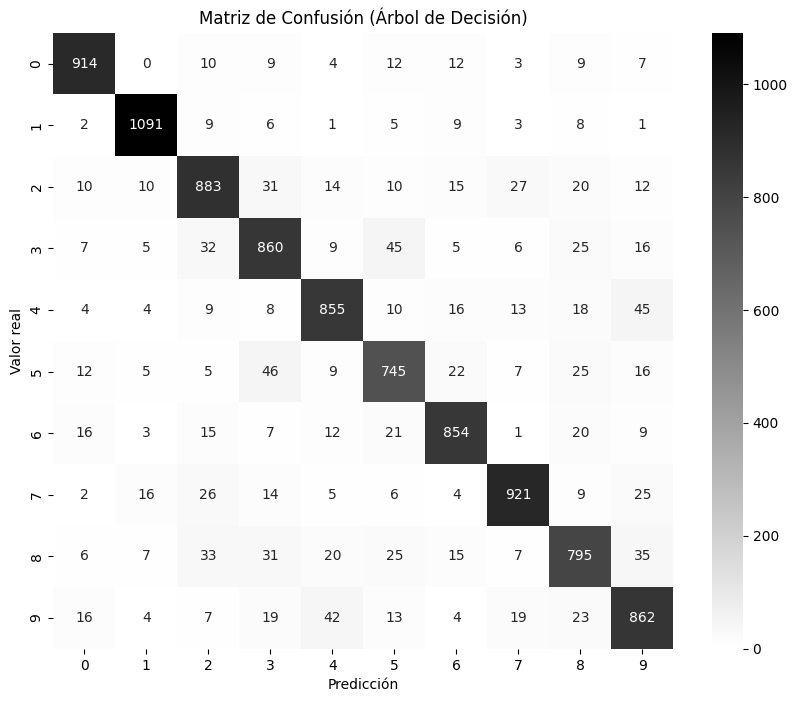

In [18]:
# prompt: Entrena un modelo con un árbol de decisión y muestrame su matriz de confusión calculada con el testset.

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Crea un clasificador de árbol de decisión
tree_model = DecisionTreeClassifier()

# Entrena el modelo usando el conjunto de entrenamiento (aplanado)
tree_model.fit(x_train_flattened, y_train)

# Predice las etiquetas para el conjunto de prueba (aplanado)
y_pred_tree = tree_model.predict(x_test.reshape(x_test.shape[0], -1))

# Calcula la matriz de confusión
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Muestra la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='gray_r')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión (Árbol de Decisión)')
plt.show()


In [19]:
# prompt: Qué precisión obtiene? para cada dígito y el promedio.

import numpy as np
# Calcula la precisión para cada dígito
precision_por_digito = np.diag(cm_tree) / np.sum(cm_tree, axis=1)

# Imprime la precisión para cada dígito
for i in range(10):
    print(f"Precisión para el dígito {i}: {precision_por_digito[i]:.2f}")

# Calcula la precisión promedio
precision_promedio = np.mean(precision_por_digito)
print(f"Precisión promedio: {precision_promedio:.2f}")


Precisión para el dígito 0: 0.93
Precisión para el dígito 1: 0.96
Precisión para el dígito 2: 0.86
Precisión para el dígito 3: 0.85
Precisión para el dígito 4: 0.87
Precisión para el dígito 5: 0.84
Precisión para el dígito 6: 0.89
Precisión para el dígito 7: 0.90
Precisión para el dígito 8: 0.82
Precisión para el dígito 9: 0.85
Precisión promedio: 0.88
